# Task 3: Fundamental Diagram

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Define file path

In [191]:
# Group 2 US101SB Contour
# 10-19
volume_contour_10_19_path = "Group 2 US101SB/volume_contour_10-19.csv"
speed_contour_10_19_path = "Group 2 US101SB/speed_contour_10-19.csv"
density_contour_10_19_path = "Group 2 US101SB/density_contour_10-19.csv"

# 10-26
volume_contour_10_26_path = "Group 2 US101SB/volume_contour_10-26.csv"
speed_contour_10_26_path = "Group 2 US101SB/speed_contour_10-26.csv"
density_contour_10_26_path = "Group 2 US101SB/density_contour_10-26.csv"


## 2. Load data

In [192]:
# 10-19
volume_contour_10_19 = pd.read_csv(volume_contour_10_19_path)
speed_contour_10_19 = pd.read_csv(speed_contour_10_19_path)
density_contour_10_19 = pd.read_csv(density_contour_10_19_path)

# 10-26
volume_contour_10_26 = pd.read_csv(volume_contour_10_26_path)
speed_contour_10_26 = pd.read_csv(speed_contour_10_26_path)
density_contour_10_26 = pd.read_csv(density_contour_10_26_path)

# Speed Contour for analysis
DATE_FOR_ANALYSIS = "10-26"
if DATE_FOR_ANALYSIS == "10-19":
    speed_contour = speed_contour_10_19
    volume_contour = volume_contour_10_19
    density_contour = density_contour_10_19
else:
    volume_contour = volume_contour_10_26
    speed_contour = speed_contour_10_26
    density_contour = density_contour_10_26


## 3. Explore the speed contour

In [193]:
# Set date as DateTimeIndex
speed_contour['date'] = pd.to_datetime(speed_contour['date'])
speed_contour.set_index('date', inplace=True)
# Replace any value greater than 80 with 80
# speed_contour = speed_contour.applymap(lambda x: 80 if x > 80 else x)

In [194]:
SPEED_JAMMED = 50
# Find stations with speed less than speed threshold, which is jammed condition.
stations = [col for col in speed_contour.columns 
            if ((speed_contour[col] < SPEED_JAMMED) & (speed_contour[col] > 0)).any()]
speed_contour_jammed = speed_contour[stations]

/var/folders/6g/xqgvnv4s1h95kfz0bd14h3_h0000gn/T/ipykernel_1459/3105945145.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_labels = pd.date_range(start='00:00:00', end='23:59:00', freq='H')


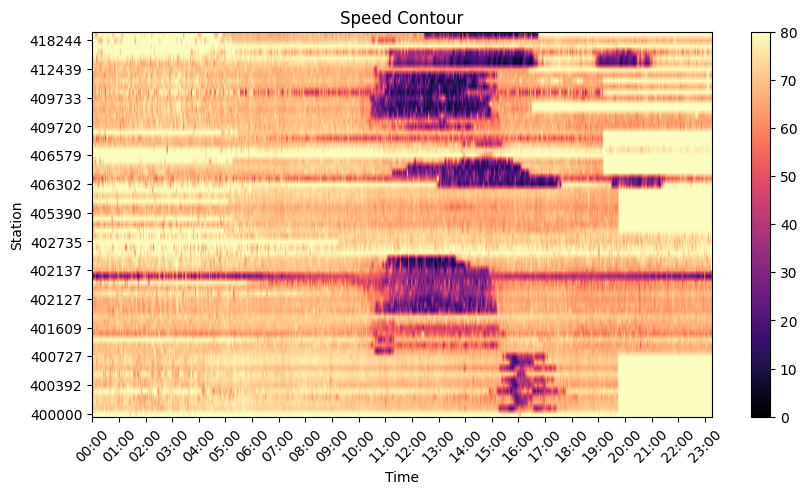

In [195]:
# Plot the speed contour as heatmap, date as x-axis, stations as y-axis, cell value as color (speed)
plt.figure(figsize=(10, 5))
# sns.heatmap(speed_contour_jammed.T, cmap='magma')
plt.imshow(speed_contour_jammed.T, aspect='auto', cmap='magma', origin='lower', interpolation='bilinear')

# Generate hourly labels
dates = speed_contour_jammed.index
hourly_labels = pd.date_range(start='00:00:00', end='23:59:00', freq='H')

# Set x-axis labels to hourly
plt.xticks(ticks=np.arange(0, len(dates), 120), labels=hourly_labels.strftime('%H:%M'), rotation=45)
plt.yticks(ticks=np.arange(0, len(stations),5), labels=stations[::5])
# Show color map
plt.title('Speed Contour')
plt.xlabel('Time')
plt.ylabel('Station')
plt.colorbar()
plt.show()

## 4. Plot fundamental diagram for one station

In [ ]:
# Get a random station
random_number = np.random.randint(0, len(stations))
random_station = stations[random_number]
random_station = '410547'

'410547'

In [221]:
# Get the speed, volume, and density of the random station
random_station_speed = speed_contour[random_station]
random_station_volume = volume_contour[random_station]
random_station_density = density_contour[random_station]

In [222]:
# Create a DataFrame for the random station
random_station_df = pd.DataFrame({'v': random_station_speed.values, 'q': random_station_volume.values, 'k': random_station_density.values})
random_station_df.head()

,v,q,k
0,80.0,0.0,0.000000
1,65.0,1.0,0.001086
2,67.0,3.0,0.003338
3,80.0,0.0,0.000000
4,74.5,6.0,0.006125


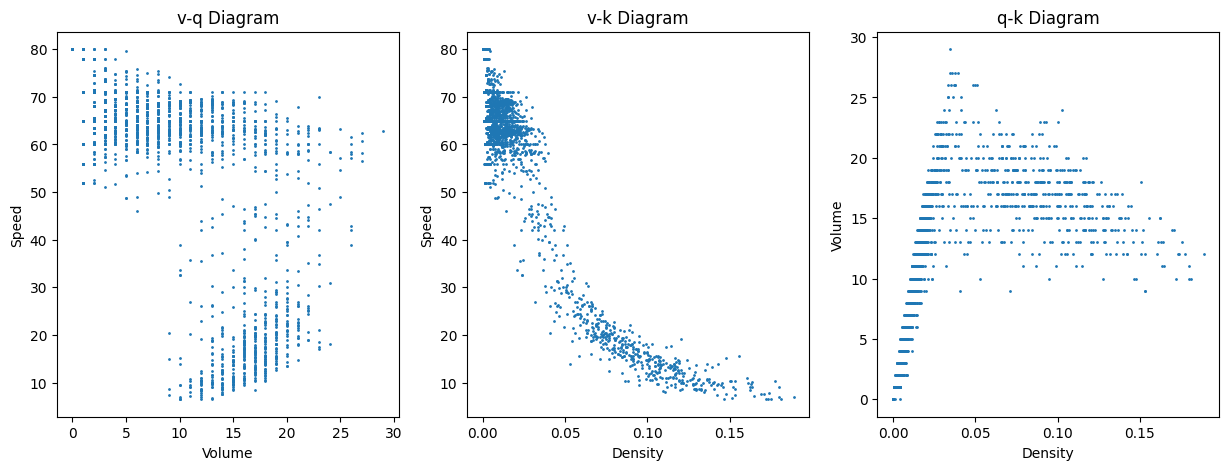

In [223]:
# Plot v-q, v-k, and q-k diagrams for one station
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(random_station_df['q'], random_station_df['v'], s=1)
plt.xlabel('Volume')
plt.ylabel('Speed')
plt.title('v-q Diagram')

plt.subplot(132)
plt.scatter(random_station_df['k'], random_station_df['v'], s=1)
plt.xlabel('Density')
plt.ylabel('Speed')
plt.title('v-k Diagram')

plt.subplot(133)
plt.scatter(random_station_df['k'], random_station_df['q'], s=1)
plt.xlabel('Density')
plt.ylabel('Volume')
plt.title('q-k Diagram')

plt.show()


## 5. Plot fundametal diagram for all stations

In [224]:
for n, station in enumerate(stations):

    station_speed = speed_contour[station].values
    station_volume = volume_contour[station].values
    station_density = density_contour[station].values

    if n == 0:
        station_df = pd.DataFrame({'station_ID': station, 'v': station_speed, 'q': station_volume, 'k': station_density})
    else:
        station_df = pd.concat([station_df, pd.DataFrame({'station_ID': station, 'v': station_speed, 'q': station_volume, 'k': station_density})])

station_df.sample(10)


,station_ID,v,q,k
669,401595,74.500000,4.0,0.003516
708,405406,80.000000,0.0,0.000000
2354,400143,67.488372,43.0,0.035214
2411,421965,80.000000,0.0,0.000000
724,405406,70.500000,10.0,0.010342
951,401599,71.260870,23.0,0.028097
455,401599,65.000000,5.0,0.006125
1380,402124,80.000000,0.0,0.000000
414,410547,80.000000,0.0,0.000000
1817,401604,48.235294,34.0,0.060229


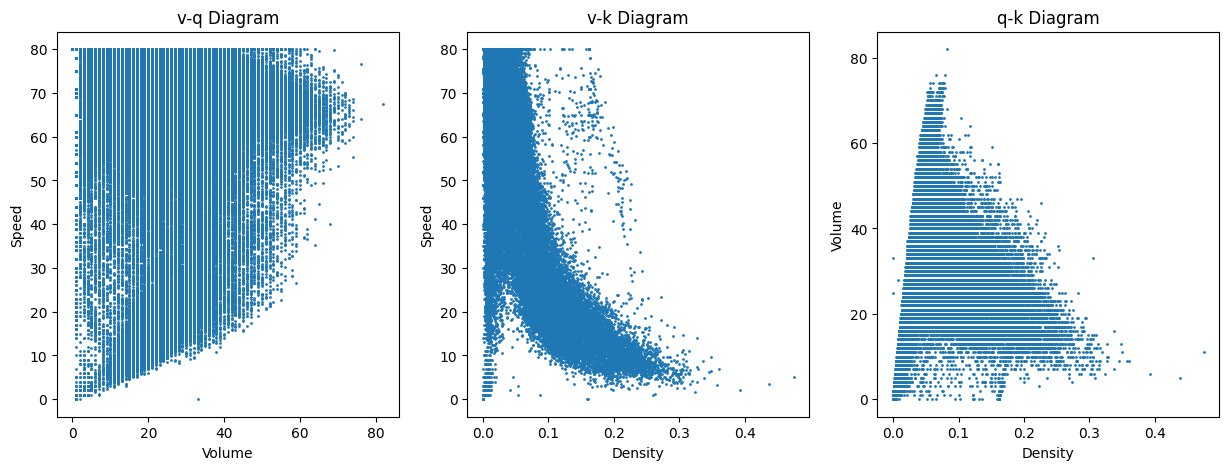

In [225]:
# Plot v-q, v-k, and q-k diagrams for all stations
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(station_df['q'], station_df['v'], s=1)
plt.xlabel('Volume')
plt.ylabel('Speed')
plt.title('v-q Diagram')

plt.subplot(132)
plt.scatter(station_df['k'], station_df['v'], s=1)
plt.xlabel('Density')
plt.ylabel('Speed')
plt.title('v-k Diagram')

plt.subplot(133)
plt.scatter(station_df['k'], station_df['q'], s=1)
plt.xlabel('Density')
plt.ylabel('Volume')
plt.title('q-k Diagram')

plt.show()